# Markovitz Efficient Portfolio

In the notebook, we present the frame of the markowitz approach and we solve it. In this approach, the performance of a portfolio will be measured by the mean of its return and its risk by its variance. 

## Building the portfolio

We assume a market $N$ assets and with two dates : $t=0$ and $t=1$ where $t=0$ corresponds to the initial investment and $t=1$ its horizon. We denote $a = (a_1, ..., a_N)^T$ the number of each unit of our portfolio. We denote $p_{i,t} the price of the asset $i$ at time $t$ and $r$ its return between $t=0$ and $t=1$. We also asusme there is a risk-free asset (RFA) with risk-free rate $r$. The number of units in this risk-free asset will be denoted $a_0$

We denote  $Y = (y_1,..., y_N)^T$ corresponds to the return vector. We denote the expected return and its variance by :
 $$\mu = \mathbb{E}[Y] = a_0(1+r)$$
  $$\Omega = Var(Y) = a^T diag(p_0) \Omega diag(p_0)a$$

The value or our portfolio $V_t$ then verify : 
$$V_t = a_0 p_t^{RFA} + a^T p_t$$

then : $$V_0 = a_0 + a^T p_0 = v$$
$$V_1 = a_0(1+r) + \sum_{i=1}^{N} a_i p_{i,0}y_i = a_0(1+r)+ a^Tdiag(p_0)Y$$

We then, in the Markowits framework, want to maximize the expected value $\mathbb{E}[V]$ of the portfolio with respect to a certain constraint in the variance $Var(V) = \sigma^2$. 

We the search the portfolio that verify the following optimization problem (classical Markovitz optimization problem): 

$$\max_{a_0, a} \mathbb{E}[V_1] = \max_{a_0, a} \left( a_0(1 + r) + a^T \text{diag}(p_0) \mu \right)$$

with respect to (w.r.t) the constraints:

$$a^T \text{diag}(p_0) \Omega \text{diag}(p_0) a = \sigma^2, \quad \text{and} \quad a_0 + a^T p_0 = v$$
We call efficient frontier all the portfolio that verify those contraints. 

Now let's work on those equations to rewrite them in a way we can resolve it. Lets denote $w_a = diag(p_0)a$, the composition vector of our portfolio iun risky asset. We then have the relations : $v = a_0 + w_a^T e, e = (1,..., 1)^T. So we have : 

$$\max_{w_a} (v-w_a^T e)(1+r) + w_a^T \mu $$
$$ \text{st : }w_a^T \Omega w_a$$

Denote $\tilde{\mu} = \mu - (1+r)e$. To solve this optimzation problem, we search the stationnary points of the following Lagrangin $\alpha(w_a, \lambda)$ function :

$$\alpha(w_a, \lambda) = w_a^T \tilde{\mu} - \frac{\lambda}{2} (w_a^T \Omega w_a - \sigma^2)$$
$$= \sum_{i=1}^{N} w_{a, i} \tilde{\mu}_i - \frac{\lambda}{2} \left(\sum_{i=1}^{N} w_{a, i}^2 \Omega_{i,i} + \sum_{i \not= j} w_{a, i} w_{a, j} \Omega_{i,j} - \sigma^2 \right)$$

The first order conditions are : 


$$\quad \frac{\partial\mathcal{\alpha}}{\partial w_{a,i}} = \tilde{\mu_i} - \lambda \left( w_{a,i} \Omega_{i,i} + \sum_{j\not= i} w_{a,j}\Omega_{i,j} \right) = 0 $$

$$\frac{\partial\mathcal{\alpha}}{\partial \lambda} = -\frac{1}{2} \left( w_a^T \Omega w_a- \sigma^2 \right) = 0 $$

Hence 
$$\tilde{\mu} - \lambda \Omega w_a = 0 \quad \text{and} \quad w_a^T \Omega w_a$$

We now can retrive the parameters $a_0, a, \lambda$ : 


$$a = \frac{1}{\lambda} diag(p_0)^{-1} \Omega^{-1} \tilde{\mu}$$

$$a_0 = v - \frac{1}{\lambda} \tilde{\mu}^T \Omega^{-1}e$$

$$\lambda = \frac{1}{\sigma} \left( \tilde{\mu}^T \Omega^{-1} \tilde{\mu} \right)^{\frac{1}{2}}$$



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
CAC40 = pd.read_csv('preprocessed_CAC40.csv')
CAC40 = CAC40[['Date', 'Name', 'Closing_Price']]
CAC40.head()

CAC40 = CAC40.pivot(index='Date', columns='Name', values='Closing_Price').reset_index()
CAC40 = CAC40.fillna(0)
CAC40.head()

Name,Date,AXA,Accor,Air Liquide,Airbus,ArcelorMittal,Atos,BNP Paribas,Bouygues,Cap Gemini,...,Sanofi,Schneider Electric,Société Générale (Societe Generale,Sodexo,TOTAL,Unibail-Rodamco,VINCI,Veolia Environnement,Vivendi,Worldline SA
0,2010-01-04,16.88,24.92,52.27,14.02,72.71,22.53,57.30,34.82,33.03,...,56.90,40.91,45.60,39.09,36.32,152.00,39.70,22.24,21.34,0.0
1,2010-01-05,17.14,24.82,51.86,13.92,72.62,23.11,57.37,35.21,33.51,...,55.96,41.12,45.54,39.51,36.35,153.95,40.26,22.36,21.34,0.0
2,2010-01-06,17.29,24.66,51.34,14.07,72.64,24.04,57.45,35.83,34.34,...,55.55,40.72,45.54,41.89,36.38,154.15,40.55,22.74,21.22,0.0
3,2010-01-07,17.09,24.27,51.34,14.24,73.28,23.96,58.50,35.92,34.16,...,56.08,40.40,46.59,41.32,36.49,155.20,40.82,23.01,21.17,0.0
4,2010-01-08,17.17,24.43,51.52,14.38,74.24,24.12,59.75,35.71,34.19,...,55.79,40.06,47.72,41.47,36.31,153.85,41.35,24.02,20.80,0.0


In [38]:
CAC40.columns

Index(['Date', 'AXA', 'Accor', 'Air Liquide', 'Airbus ', 'ArcelorMittal',
       'Atos', 'BNP Paribas', 'Bouygues', 'Cap Gemini', 'Crédit Agricole',
       'Danone', 'Dassault Systèmes', 'Engie (ex GDF Suez', 'EssilorLuxottica',
       'Hermès (Hermes International', 'Kering', 'LEGRAND', 'LOréal',
       'LVMH Moet Hennessy Louis Vuitton',
       'Michelin (Compagnie Générale d Etablissements Michelin SCPA', 'Orange',
       'Pernod Ricard', 'Peugeot', 'Publicis', 'Renault', 'SAFRAN',
       'STMicroelectronics', 'Saint-Gobain', 'Sanofi', 'Schneider Electric',
       'Société Générale (Societe Generale', 'Sodexo', 'TOTAL',
       'Unibail-Rodamco', 'VINCI', 'Veolia Environnement', 'Vivendi',
       'Worldline SA'],
      dtype='object', name='Name')

- Example of one asset of the CAC40 : Total

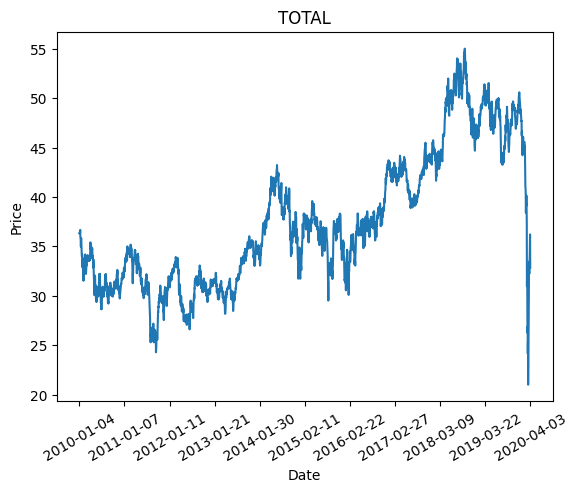

In [27]:
price = CAC40['TOTAL'].to_numpy()
dates = CAC40['Date'].to_numpy()

plt.plot(dates, price)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TOTAL')
step = len(price) //  10
dates_to_display = dates[::step]
plt.xticks(dates_to_display, rotation=30) 
plt.show()

- The 40 assets of the CAC40 :

AXA
Accor
Air Liquide
Airbus 
ArcelorMittal
Atos
BNP Paribas
Bouygues
Cap Gemini
Crédit Agricole
Danone
Dassault Systèmes
Engie (ex GDF Suez
EssilorLuxottica
Hermès (Hermes International
Kering
LEGRAND
LOréal
LVMH Moet Hennessy Louis Vuitton
Michelin (Compagnie Générale d Etablissements Michelin SCPA
Orange
Pernod Ricard
Peugeot
Publicis
Renault
SAFRAN
STMicroelectronics
Saint-Gobain
Sanofi
Schneider Electric
Société Générale (Societe Generale
Sodexo
TOTAL
Unibail-Rodamco
VINCI
Veolia Environnement
Vivendi
Worldline SA


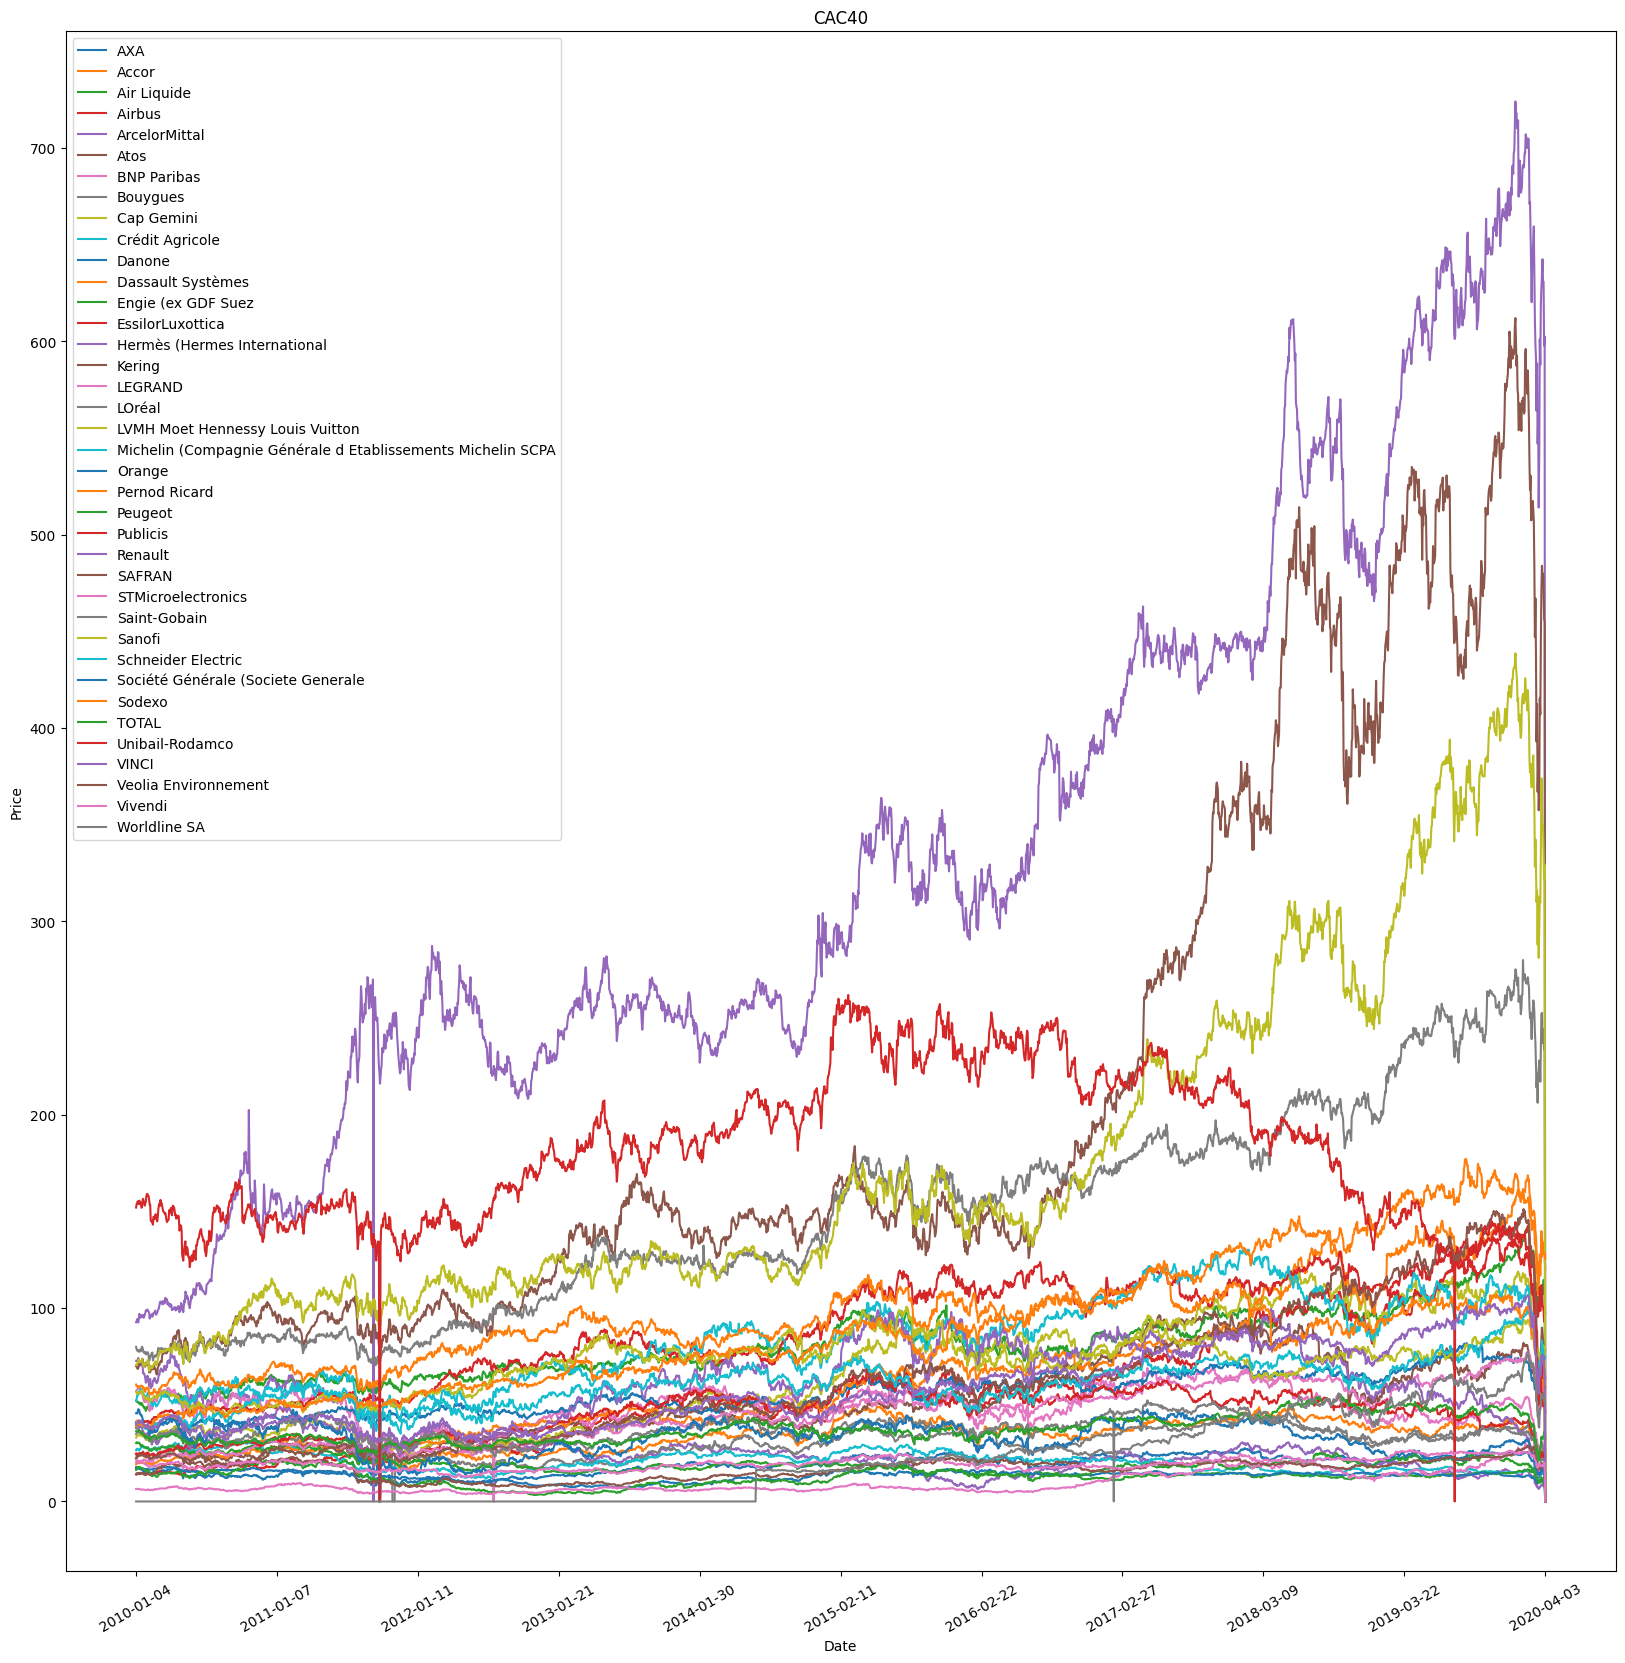

In [42]:
plt.figure(figsize=(20, 20))
dates = CAC40['Date'].to_numpy()

for company in CAC40.columns[1:]: 
    print(company)
    price = CAC40[company].to_numpy()
    plt.plot(dates, price, label = company)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('CAC40')
step = len(price) //  10
dates_to_display = dates[::step]
plt.xticks(dates_to_display, rotation=30) 
plt.show()